# Get GRFN S1 InSAR data from Earthdata Search (CMR API)

https://search.earthdata.nasa.gov/search?q=GRFN 

"Getting Ready for NISAR" GRFN project is posting automatically processed Sentinel1 InSAR data to NASA

This notebook tries to query and ideally download that data to analyze with xarray

In [24]:
from cmr import CollectionQuery, GranuleQuery
import json

In [3]:
api = CollectionQuery()

In [5]:
api.keyword('sentinel')

In [8]:
print(api.hits())

88


In [10]:
[print(x['summary']) for x in api.get_all()]

Sentinel-1A Metadata for OCN product
SENTINEL-1A Level 2 Ocean wind, wave and current data
Sentinel-1B Metadata for OCN product
Sentinel-1B Level 2 Ocean wind, wave and current data
Sentinel-1 SLC interferometric products generated by JPL using ISCE v2.0.0, delivered by ASF
Sentinel-1 full resolution wrapped SLC interferogram and digital elevation model
Sentinel-1 unwrapped interferogram with topographic phase removed and coherence image between master and slave S1 images
Sentinel-1A Dual-pol ground range detected full resolution images
Sentinel-1A Dual-pol ground projected high and full resolution images
Sentinel-1A Dual-pol ground projected medium resolution images
Sentinel-1A Dual-pol ground range detected full resolution metadata
Sentinel-1A Dual-pol ground projected high and full resolution metadata
Sentinel-1A Dual-pol ground projected medium resolution metadata
Metadata for Sentinel-1A level zero product
Metadata for Sentinel-1A slant-range product
Sentinel-1A slant-range produc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [12]:
api.keyword('GRFN')
print(api.hits())
[print(x['summary']) for x in api.get_all()]

3
Sentinel-1 SLC interferometric products generated by JPL using ISCE v2.0.0, delivered by ASF
Sentinel-1 full resolution wrapped SLC interferogram and digital elevation model
Sentinel-1 unwrapped interferogram with topographic phase removed and coherence image between master and slave S1 images


[None, None, None]

In [21]:
collections = api.get_all()
collection = collections[0]

In [22]:
print(collection)

{'processing_level_id': '2', 'boxes': ['18.84486 -156.4174 20.31149 -154.672', '30.13852 -114.0486 37.00386 -112.4875', '53.97382 -165.6942 55.19449 -161.2068', '34.68611 -120.6429 35.68992 -119.0944', '31.94 -104.86 32.6 -103.6'], 'time_start': '2014-06-15T03:44:43.000Z', 'version_id': '1', 'updated': '2016-12-07T23:10:00.000Z', 'dataset_id': 'Sentinel-1 All Interferometric Products (BETA)', 'has_spatial_subsetting': False, 'has_transforms': False, 'has_variables': False, 'data_center': 'ASF', 'short_name': 'SENTINEL-1_INSAR_ALL_INTERFEROMETRIC_PRODUCTS', 'organizations': ['Alaska Satellite Facility', 'Jet Propulsion Laboratory'], 'title': 'Sentinel-1 All Interferometric Products (BETA)', 'coordinate_system': 'CARTESIAN', 'summary': 'Sentinel-1 SLC interferometric products generated by JPL using ISCE v2.0.0, delivered by ASF', 'orbit_parameters': {}, 'id': 'C1379535891-ASF', 'has_formats': False, 'score': 0.5, 'original_format': 'ECHO10', 'archive_center': 'Alaska Satellite Facility',

In [25]:
# Nicer formatting
print(json.dumps(collection, indent=2))

{
  "processing_level_id": "2",
  "boxes": [
    "18.84486 -156.4174 20.31149 -154.672",
    "30.13852 -114.0486 37.00386 -112.4875",
    "53.97382 -165.6942 55.19449 -161.2068",
    "34.68611 -120.6429 35.68992 -119.0944",
    "31.94 -104.86 32.6 -103.6"
  ],
  "time_start": "2014-06-15T03:44:43.000Z",
  "version_id": "1",
  "updated": "2016-12-07T23:10:00.000Z",
  "dataset_id": "Sentinel-1 All Interferometric Products (BETA)",
  "has_spatial_subsetting": false,
  "has_transforms": false,
  "has_variables": false,
  "data_center": "ASF",
  "short_name": "SENTINEL-1_INSAR_ALL_INTERFEROMETRIC_PRODUCTS",
  "organizations": [
    "Alaska Satellite Facility",
    "Jet Propulsion Laboratory"
  ],
  "title": "Sentinel-1 All Interferometric Products (BETA)",
  "coordinate_system": "CARTESIAN",
  "summary": "Sentinel-1 SLC interferometric products generated by JPL using ISCE v2.0.0, delivered by ASF",
  "orbit_parameters": {},
  "id": "C1379535891-ASF",
  "has_formats": false,
  "score": 0.5,


In [32]:
# Take a look at associated granules
api = GranuleQuery()
for C in collections:
    name = C['short_name']
    api.short_name(name)
    print('{} granules in {}'.format(api.hits(), name))

14764 granules in SENTINEL-1_INSAR_ALL_INTERFEROMETRIC_PRODUCTS
14763 granules in SENTINEL-1_INSAR_FULL_RES_WRAPPED_INTERFEROGRAM_AND_DEM
14763 granules in SENTINEL-1_INSAR_UNWRAPPED_INTERFEROGRAM_AND_COHERENCE_MAP


In [36]:
granule = api.get(1)[0]

In [38]:
print(json.dumps(granule, indent=2))

{
  "producer_granule_id": "S1-IFG_RM_M1S2_TN073_20141103T170347-20141010T170317_s1-poeorb-5573-v1.1.3-standard",
  "time_start": "2014-10-10T17:03:17.000Z",
  "updated": "2017-09-13T16:40:25.000Z",
  "orbit_calculated_spatial_domains": [
    {
      "orbit_number": "3120"
    },
    {
      "orbit_number": "2770"
    }
  ],
  "dataset_id": "Sentinel-1 Unwrapped Interferogram and Coherence Map (BETA)",
  "data_center": "ASF",
  "title": "S1-IFG_RM_M1S2_TN073_20141103T170347-20141010T170317_s1-poeorb-5573-v1.1.3-standard-Unwrapped",
  "coordinate_system": "GEODETIC",
  "day_night_flag": "UNSPECIFIED",
  "time_end": "2014-11-03T17:03:47.000Z",
  "id": "G1410703535-ASF",
  "original_format": "ECHO10",
  "granule_size": "590.53015",
  "browse_flag": true,
  "polygons": [
    [
      "56.620094 -159.2595225 56.7744824 -160.6510875 55.110054 -161.2215483 54.9584548 -159.8890655 56.620094 -159.2595225"
    ]
  ],
  "online_access_flag": true,
  "links": [
    {
      "rel": "http://esipfed.or

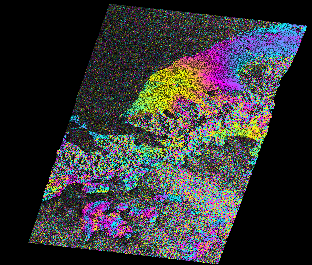

In [45]:
# Display the image
from IPython.display import Image
browse = granule['links'][1]['href']
Image(browse)

In [46]:
# Plot where it is on a map - turn into geopandas?
granule['polygons']

[['56.620094 -159.2595225 56.7744824 -160.6510875 55.110054 -161.2215483 54.9584548 -159.8890655 56.620094 -159.2595225']]

In [48]:
# DOwnload the actual data
data = granule['links'][0]['href']
print(data)

https://grfn.asf.alaska.edu/door/download/S1-IFG_RM_M1S2_TN073_20141103T170347-20141010T170317_s1-poeorb-5573-v1.1.3-standard.unw_geo.zip


In [49]:
!wget {data}

--2018-01-16 18:16:40--  https://grfn.asf.alaska.edu/door/download/S1-IFG_RM_M1S2_TN073_20141103T170347-20141010T170317_s1-poeorb-5573-v1.1.3-standard.unw_geo.zip
Resolving grfn.asf.alaska.edu... 34.197.255.166, 34.205.102.62
Connecting to grfn.asf.alaska.edu|34.197.255.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://urs.earthdata.nasa.gov/oauth/authorize?app_type=401&client_id=iwntGSgHy9yoog7Mjag0dQ&response_type=code&redirect_uri=https%3A%2F%2Fgrfn.asf.alaska.edu%2Fdoor%2Foauth&state=aHR0cDovL2dyZm4uYXNmLmFsYXNrYS5lZHUvZG9vci9kb3dubG9hZC9TMS1JRkdfUk1fTTFTMl9UTjA3M18yMDE0MTEwM1QxNzAzNDctMjAxNDEwMTBUMTcwMzE3X3MxLXBvZW9yYi01NTczLXYxLjEuMy1zdGFuZGFyZC51bndfZ2VvLnppcA [following]
--2018-01-16 18:16:41--  https://urs.earthdata.nasa.gov/oauth/authorize?app_type=401&client_id=iwntGSgHy9yoog7Mjag0dQ&response_type=code&redirect_uri=https%3A%2F%2Fgrfn.asf.alaska.edu%2Fdoor%2Foauth&state=aHR0cDovL2dyZm4uYXNmLmFsYXNrYS5lZHUvZG9vci9kb3dubG9hZC9TMS1JRkdfUk

# Actually, the file download didn't work. 

### if you click on the link from the previous output cell, you are redirected to NASA login and then redirected to the following error message:

This file is in long term storage. We're fetching it for you and will email you shortly at sth54@cornell.edu when it's available to download. 

Unsubscribe from email notifications 

Home